In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
from pydotplus import graph_from_dot_data
from graphviz import Source

# EXERCISE 6

In [2]:
df = pd.read_csv('crabs_dataset.csv')
X = df.iloc[:,[3,4,5,6,7]].to_numpy()
y = df.iloc[:, [0,1]].to_numpy()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [4]:
y_train_int = []
for couple in y_train:
    if (couple[0] == 'B' and couple[1] == 'M'):
        y_train_int.append([0,0])
    elif (couple[0] == 'B' and couple[1] == 'F'):
        y_train_int.append([0,1])
    elif (couple[0] == 'O' and couple[1] == 'M'):
        y_train_int.append([1,0])
    elif (couple[0] == 'O' and couple[1] == 'F'):
        y_train_int.append([1,1])       
y_train_int = np.array(y_train_int)

In [5]:
DTC_model = DecisionTreeClassifier(max_depth=2)
DTC_model = DTC_model.fit(X_train, y_train_int)
y_int_CVP = cross_val_predict(DTC_model, X_train, y_train_int, cv=3)
f1_score(y_train_int, y_int_CVP, average='macro')

0.5975564993969902

In [6]:
predict = DTC_model.predict(X_test)
predict_proba = DTC_model.predict_proba(X_test)

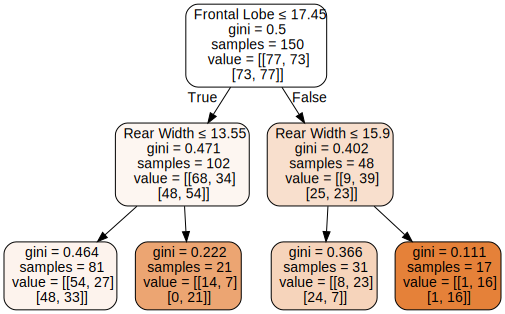

In [7]:
dot_data = export_graphviz(DTC_model, out_file=None, feature_names=['Frontal Lobe', 'Rear Width', 'Carapace Width', 'Carapace length', 'Body Depth'], class_names=True, filled=True, rounded=True, special_characters=True)
graph = graph_from_dot_data(dot_data)
graph.write_pdf("crabs.pdf")
Source(dot_data)